In [3]:
%pip install pandas
%pip install scikit-learn
%pip install chardet
%pip install wordcloud
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\17085\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\17085\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\Users\17085\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\17085\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\17085\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [4]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

from typing import Iterable, Tuple, List
from scipy.sparse import csr_matrix
from wordcloud import WordCloud
import matplotlib.pyplot as plt

## Inspect

In [6]:
df = pd.read_csv("C:/Users/17085/anaconda3/envs/W207Project/flipkart_product.csv", encoding='ISO-8859–1')

## Topic Modeling

In [15]:
from typing import Iterable, List

def find_topics(reviews: Iterable[str], num_topics: int = 5, num_words_per_topic: int = 5) -> List[str]:
    count = CountVectorizer(stop_words='english', max_df=.1, max_features=10000)
    bag_of_words = count.fit_transform(reviews)
    lda = LatentDirichletAllocation(n_components=num_topics, random_state=123, learning_method='batch')
    lda.fit(bag_of_words)
    feature_names = count.get_feature_names_out()
    topics = []
    for topic_idx, topic in enumerate(lda.components_): 
        topics.append(" ".join([feature_names[i] for i in topic.argsort()[:-num_words_per_topic - 1:-1]]))
    return topics

In [16]:
top_10_products = df.ProductName.value_counts()[:10].index.tolist()
by_product_neg = df.loc[(df.ProductName.isin(top_10_products)) & (df.Rate < 3), :].groupby(by=["ProductName"], group_keys=False)
by_product_pos = df.loc[(df.ProductName.isin(top_10_products)) & (df.Rate > 3), :].groupby(by=["ProductName"], group_keys=False)
#find_topics(df.loc[df.Rate < 3, "Summary"], num_topics=10, num_words_per_topic=3)

In [17]:
from functools import partial

def apply_topic_modeling(group: pd.DataFrame, num_topics: int = 5, num_words_per_topic: int = 5) -> pd.DataFrame:
    product = group.ProductName.values[0]
    topics = find_topics(group.Summary, num_topics=num_topics, num_words_per_topic=num_words_per_topic)
    return pd.DataFrame(data={"Product": [product for _ in range(num_topics)], "Topic Number": list(range(1, num_topics+1)), "Topic": topics})

In [18]:
f = partial(apply_topic_modeling, num_topics=5, num_words_per_topic=3)
result_neg = by_product_neg.apply(f)

In [19]:
f = partial(apply_topic_modeling, num_topics=5, num_words_per_topic=3)
result_pos = by_product_pos.apply(f)

Word Analysis - General plan

Create wordcloud for negative results
- Do top products with most neg results
    
Take 2-3 common words from this as opportunities for product improvement
- For each word, pull all reviews with that word and see ratio of positive:negative results
This will determine if it's worth investigating further

If most of them are negative, then create general improvement plan
- General idea to improve this part of the product
- Sum of reviews with this negative review to see customer impact
- Sum of $$$ with this negative review, if these are all people who bought the product only one time with no intentions of buying again, how much additional revenue can we bring in if they become return buyers?
- Product reviews are only from a 3 day span, how much additional yearly revenue is this?

In [22]:
print(top_10_products)
print(by_product_neg.head(1))

['MILTON Thermosteel Flip Lid 500 ml FlaskÂ\xa0Â\xa0(Pack of 1, Silver, Steel)', 'cello Pack of 18 Opalware Cello Dazzle Lush Fiesta Opalware Dinner Set, 18 Pieces Dinner SetÂ\xa0Â\xa0(White, Microwave Safe)', 'Home Sizzler 153 cm (5.02 ft) Polyester Room Darkening Window Curtain (Pack Of 2)Â\xa0Â\xa0(Floral, Brown)', 'CMerchants Multi Organiser BLue-4 Book Shelf Metal Open Book ShelfÂ\xa0Â\xa0(Finish Color - BLUE, DIY(Do-It-Yourself))', 'Kadio Analog 20 cm X 20 cm Wall ClockÂ\xa0Â\xa0(Beige, With Glass, Standard)', 'Cosito 144 TC Cotton Double Floral Flat BedsheetÂ\xa0Â\xa0(Pack of 1, Red, White)', 'Mi 5A 80 cm (32 inch) HD Ready LED Smart Android TV with Dolby Audio (2022 Model)', 'Mi 3i 10000 mAh Power Bank (Fast Charging, 18W)Â\xa0Â\xa0(Blue, Lithium Polymer)', 'Singer FM 1409 Electric Sewing MachineÂ\xa0Â\xa0( Built-in Stitches 9)', 'Men Cargos']
                                              ProductName      Price  Rate   
5446    Cosito 144 TC Cotton Double Floral Flat Bedshe... 

In [23]:
# get the count of each product name and sort by count
product_counts = by_product_neg['ProductName'].value_counts().sort_values(ascending=False)
print(product_counts)
# select the top 5 products by count
top_products = product_counts[:5].index.tolist()


ProductName
cello Pack of 18 Opalware Cello Dazzle Lush Fiesta Opalware Dinner Set, 18 Pieces Dinner SetÂ Â (White, Microwave Safe)    576
Men Cargos                                                                                                                 508
MILTON Thermosteel Flip Lid 500 ml FlaskÂ Â (Pack of 1, Silver, Steel)                                                     497
Kadio Analog 20 cm X 20 cm Wall ClockÂ Â (Beige, With Glass, Standard)                                                     362
CMerchants Multi Organiser BLue-4 Book Shelf Metal Open Book ShelfÂ Â (Finish Color - BLUE, DIY(Do-It-Yourself))           283
Cosito 144 TC Cotton Double Floral Flat BedsheetÂ Â (Pack of 1, Red, White)                                                268
Mi 5A 80 cm (32 inch) HD Ready LED Smart Android TV with Dolby Audio (2022 Model)                                          264
Mi 3i 10000 mAh Power Bank (Fast Charging, 18W)Â Â (Blue, Lithium Polymer)                         

In [24]:
# get list of most reviewed products with negative reviews
# create an empty dataframe to store the top product data
top_neg_product_df = pd.DataFrame(columns=['ProductName', 'Price', 'Rate', 'Review', 'Summary'])

# iterate over the top products
for product_name in top_products:
    # get the group for the current product
    group = by_product_neg.get_group(product_name)
    # append the group data to the dataframe
    top_neg_product_df = pd.concat([top_neg_product_df, group[['ProductName', 'Price', 'Rate', 'Review', 'Summary']]])

# print the resulting dataframe
# I'm also removing 'Men Cargos' from this, after looking into it I didn't find any positive or negative reviews worthwhile
top_neg_product_df = top_neg_product_df[top_neg_product_df['ProductName'] != 'Men Cargos']

print(top_neg_product_df)



                                              ProductName     Price Rate   
162686  cello Pack of 18 Opalware Cello Dazzle Lush Fi...  â¹1,299    2  \
162745  cello Pack of 18 Opalware Cello Dazzle Lush Fi...  â¹1,299    1   
162747  cello Pack of 18 Opalware Cello Dazzle Lush Fi...  â¹1,299    1   
162759  cello Pack of 18 Opalware Cello Dazzle Lush Fi...  â¹1,299    2   
162761  cello Pack of 18 Opalware Cello Dazzle Lush Fi...  â¹1,299    1   
...                                                   ...       ...  ...   
36371   CMerchants Multi Organiser BLue-4 Book Shelf M...    â¹625    1   
36373   CMerchants Multi Organiser BLue-4 Book Shelf M...    â¹625    2   
36374   CMerchants Multi Organiser BLue-4 Book Shelf M...    â¹625    2   
36387   CMerchants Multi Organiser BLue-4 Book Shelf M...    â¹625    2   
36400   CMerchants Multi Organiser BLue-4 Book Shelf M...    â¹625    1   

                           Review   
162686        Could be way better  \
162745       

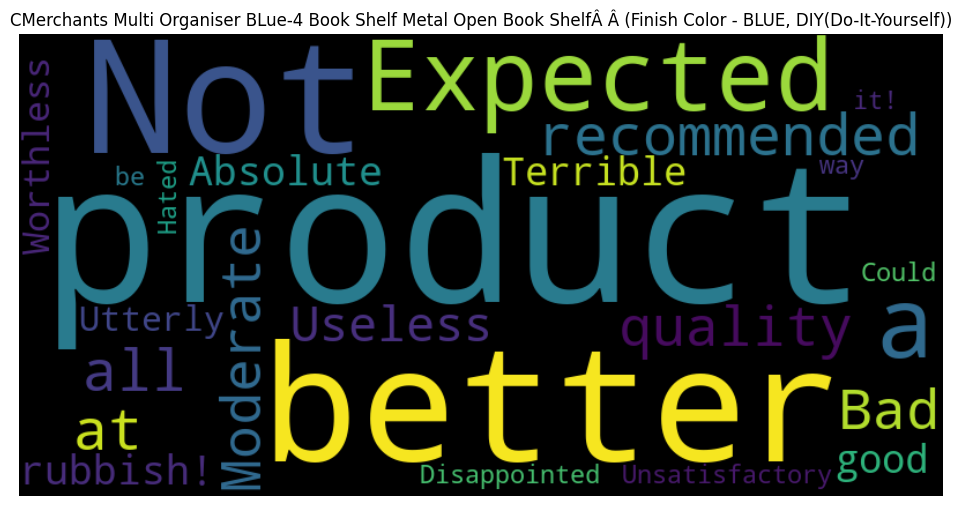

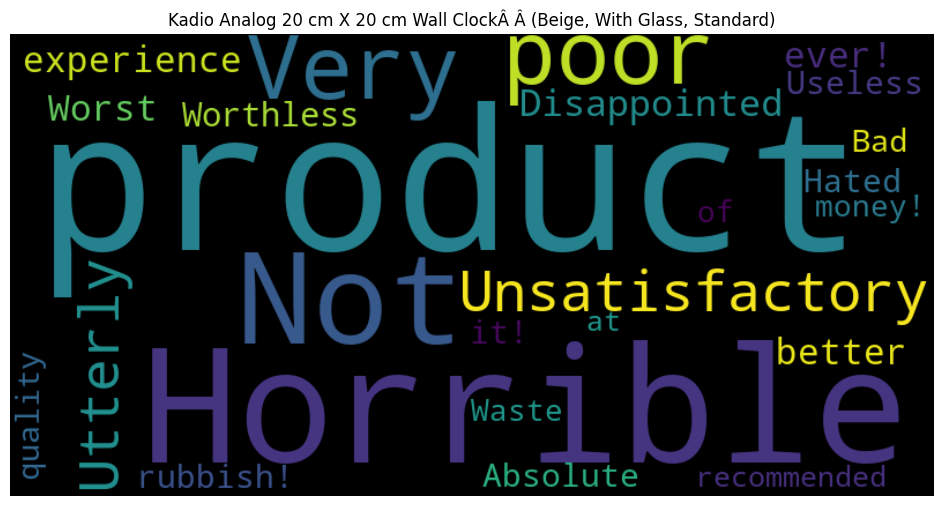

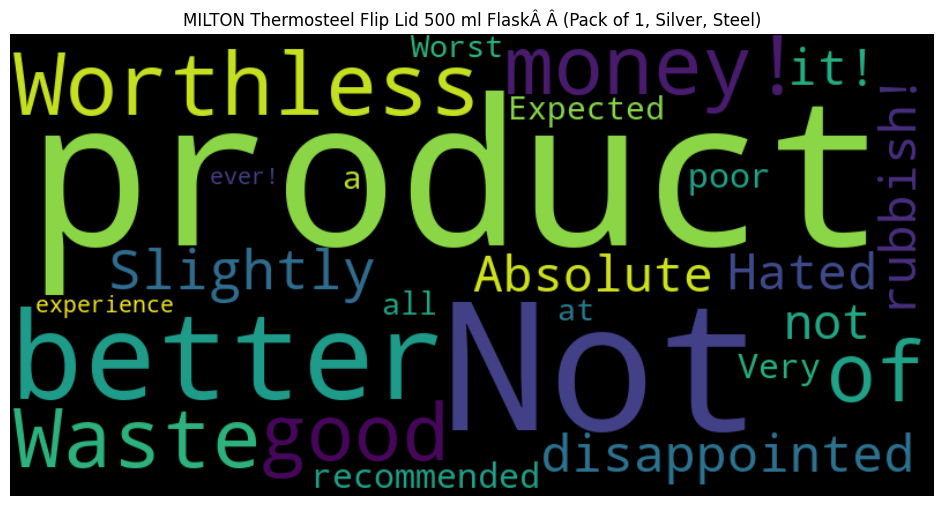

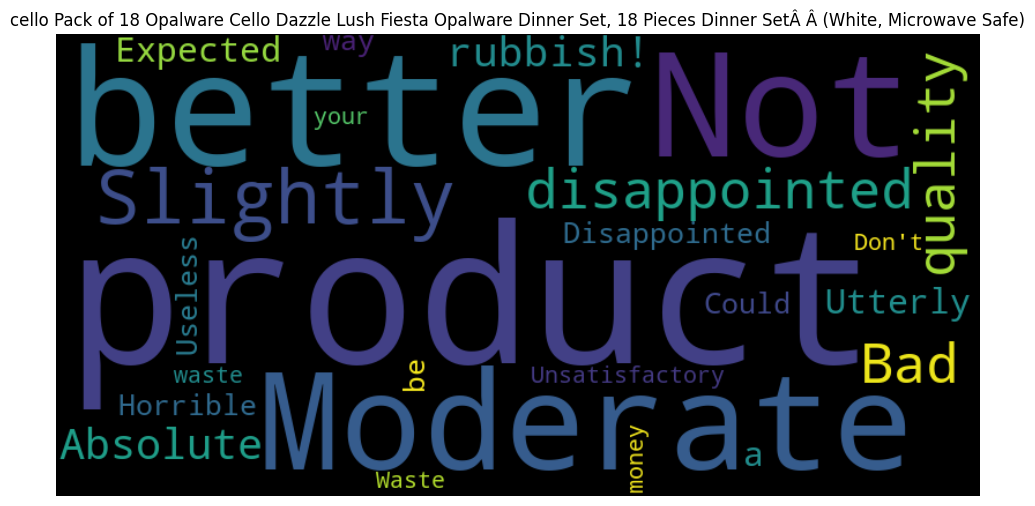

In [25]:
# creating wordclouds for negative words

#top_neg_product_df is a pandas DataFrame with 4 columns: ProductName, Price, Rate, and Review
grouped = top_neg_product_df.groupby('ProductName')

# iterate over each group for the top products only
for name, group in grouped:
    if name in top_products:
        # combine all the text in the topic column into a single string
        text = ' '.join(group['Review'])

        # tokenize the string and count the frequency of each word
        tokens = text.split()
        word_counts = {}
        for token in tokens:
            if token in word_counts:
                word_counts[token] += 1
            else:
                word_counts[token] = 1

        # select the top words based on their frequency
        top_words = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)[:25]
        top_words = dict(top_words)

        # print the words used in the WordCloud
        #print(f"Words used in the {name} WordCloud:")
        #for word in wc.words_:
            #print(word)

        # create a word cloud for the product
        wc = WordCloud(width=800, height=400, background_color='black')
        wc.generate_from_frequencies(top_words)
        plt.figure(figsize=(12, 6))
        plt.imshow(wc, interpolation='bilinear')
        plt.axis('off')
        plt.title(name)
        plt.show()


In [26]:
product_counts = top_neg_product_df['ProductName'].value_counts().sort_values(ascending=False)
print(product_counts)

ProductName
cello Pack of 18 Opalware Cello Dazzle Lush Fiesta Opalware Dinner Set, 18 Pieces Dinner SetÂ Â (White, Microwave Safe)    576
MILTON Thermosteel Flip Lid 500 ml FlaskÂ Â (Pack of 1, Silver, Steel)                                                     497
Kadio Analog 20 cm X 20 cm Wall ClockÂ Â (Beige, With Glass, Standard)                                                     362
CMerchants Multi Organiser BLue-4 Book Shelf Metal Open Book ShelfÂ Â (Finish Color - BLUE, DIY(Do-It-Yourself))           283
Name: count, dtype: int64


In [27]:
# create a list of top negative products
top_neg_products_list = top_neg_product_df['ProductName'].unique().tolist()

# filter the original dataframe to keep only rows with products from the list
filtered_df = df[df['ProductName'].isin(top_neg_products_list)]

# then I will use this to compare the negative to positive reviews from this list
print(filtered_df['ProductName'].unique())


['CMerchants Multi Organiser BLue-4 Book Shelf Metal Open Book ShelfÂ\xa0Â\xa0(Finish Color - BLUE, DIY(Do-It-Yourself))'
 'Kadio Analog 20 cm X 20 cm Wall ClockÂ\xa0Â\xa0(Beige, With Glass, Standard)'
 'MILTON Thermosteel Flip Lid 500 ml FlaskÂ\xa0Â\xa0(Pack of 1, Silver, Steel)'
 'cello Pack of 18 Opalware Cello Dazzle Lush Fiesta Opalware Dinner Set, 18 Pieces Dinner SetÂ\xa0Â\xa0(White, Microwave Safe)']


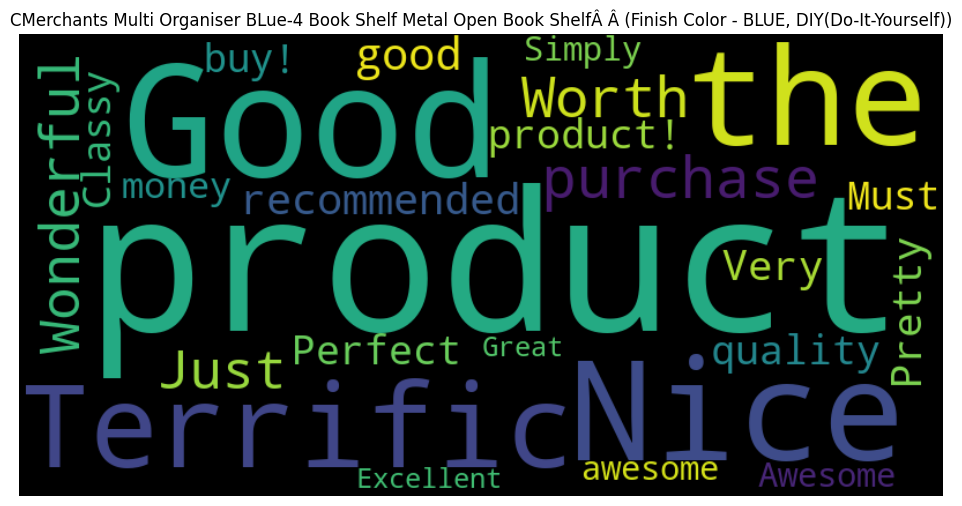

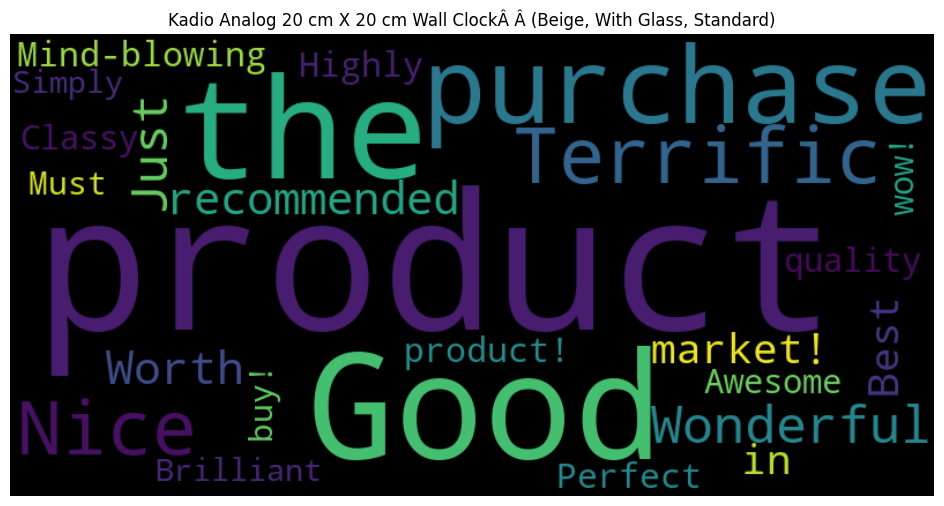

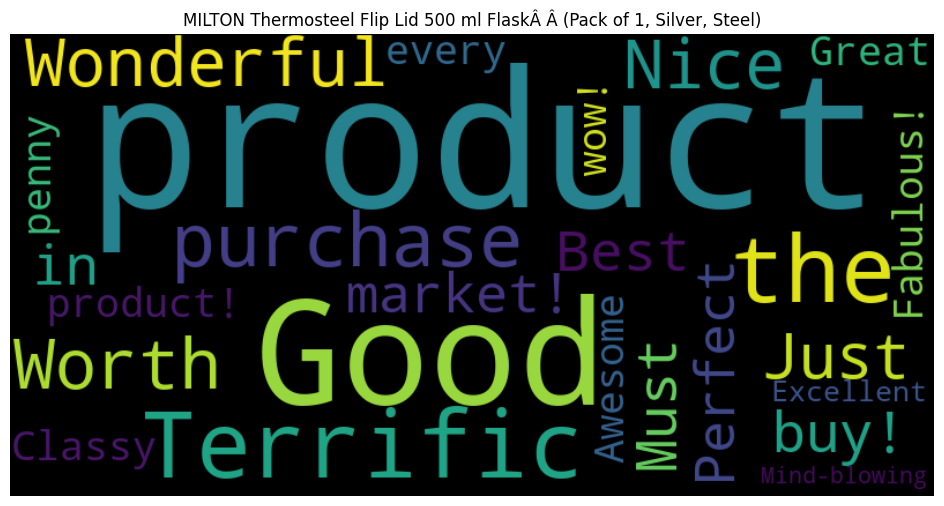

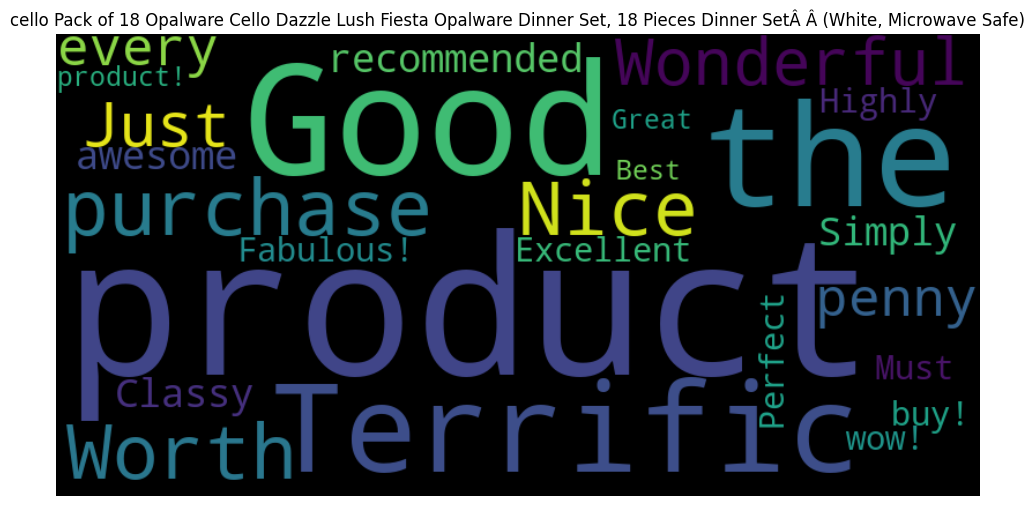

In [28]:
#filtered_df is a pandas DataFrame with 4 columns: ProductName, Price, Rate, and Review
grouped2 = filtered_df.groupby('ProductName')

# iterate over each group for the top products only
for name, group in grouped2:
    if name in top_products:
        # combine all the text in the topic column into a single string
        text = ' '.join(group['Review'])

        # tokenize the string and count the frequency of each word
        tokens = text.split()
        word_counts = {}
        for token in tokens:
            if token in word_counts:
                word_counts[token] += 1
            else:
                word_counts[token] = 1

        # select the top words based on their frequency
        top_words = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)[:25]
        top_words = dict(top_words)

        # create a word cloud for the product
        wc = WordCloud(width=800, height=400, background_color='black')
        wc.generate_from_frequencies(top_words)

        # print the words used in the WordCloud
        #print(f"Words used in the {name} WordCloud:")
        #for word in wc.words_:
            #print(word)

        # create a word cloud for the product
        plt.figure(figsize=(12, 6))
        plt.imshow(wc, interpolation='bilinear')
        plt.axis('off')
        plt.title(name)
        plt.show()


In [32]:
#I don't have any positive reviews for CMerchants Multi Organiser BLue-4 Book Shelf Metal Open Book ShelfÂ Â (Finish Color - BLUE, DIY(Do-It-Yourself))
# this is for double checking that my above code is correct

for name, group in grouped:
    if name in filtered_df:
        print(f"\n{name} ({len(group)})")
        if len(group) == 0:
            print(f"No reviews found for {name}")
        else:
            print(f"Sample review for {name}: {group['Review'].iloc[0]}")

# I don't see the book shelf, but I also don't see any positive reviews
# I feel safe to assume there are no positive reviews based on this

# replace 'certain_value' with the actual value you're interested in
num_rows = filtered_df.loc[filtered_df['ProductName'] == 'cello Pack of 18 Opalware Cello Dazzle Lush Fiesta Opalware Dinner Set, 18 Pieces Dinner SetÂ\xa0Â\xa0(White, Microwave Safe)'].shape[0]
print("Number of rows where ProductName is 'certain_value':", num_rows)



Number of rows where ProductName is 'certain_value': 8870


In [137]:
# now I want to do a cost analysis
# I'll sum up the amoutn of money spent of the prodcuts with the most negative reviews

# gets rid of commas and Indian Rupee symbol
top_neg_product_df['Price'] = top_neg_product_df['Price'].astype(str).str.replace(',', '').str.replace('â¹', '').astype(float)

# gives me list of only unique products
unique_products = top_neg_product_df['ProductName'].unique()

# the will take the unique items from my list of negative products, and multipy the price by the total number of bad reviews
for product in unique_products:
    rows = top_neg_product_df.loc[top_neg_product_df['ProductName'] == product]
    product_price = rows['Price'].iloc[0]
    product_count = product_counts[product]
    total_cost = product_price * product_count
    #converts it from Indian Rupees to American dollars
    total_cost_usd = total_cost / 75
    print(product, "${:.2f}".format(total_cost_usd))

    

cello Pack of 18 Opalware Cello Dazzle Lush Fiesta Opalware Dinner Set, 18 Pieces Dinner SetÂ Â (White, Microwave Safe) $9976.32
MILTON Thermosteel Flip Lid 500 ml FlaskÂ Â (Pack of 1, Silver, Steel) $4294.08
Kadio Analog 20 cm X 20 cm Wall ClockÂ Â (Beige, With Glass, Standard) $1086.00
CMerchants Multi Organiser BLue-4 Book Shelf Metal Open Book ShelfÂ Â (Finish Color - BLUE, DIY(Do-It-Yourself)) $2358.33


In [138]:
((9976.32/3)*365)+((4294.08/3)*365)+((1086/3)*365)+((2358.33/3)*365)

2155292.15